
___
# Logistic Regression Project 

We will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

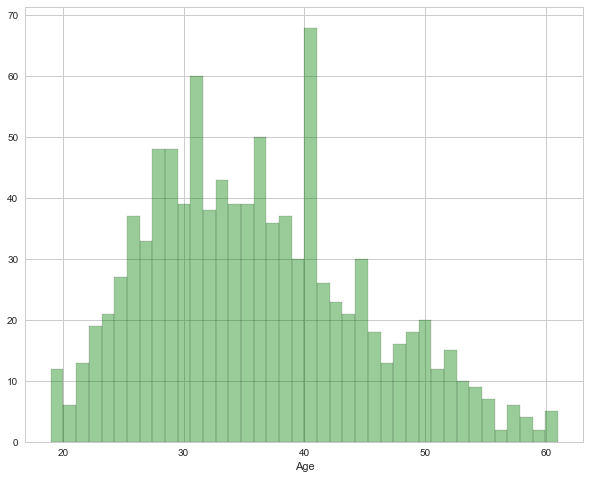

In [12]:
plt.rcParams["patch.force_edgecolor"]=True
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.distplot(ad_data['Age'], kde=False, bins=40, color='green')

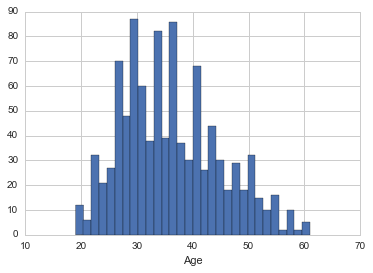

**Create a jointplot showing Area Income versus Age.**

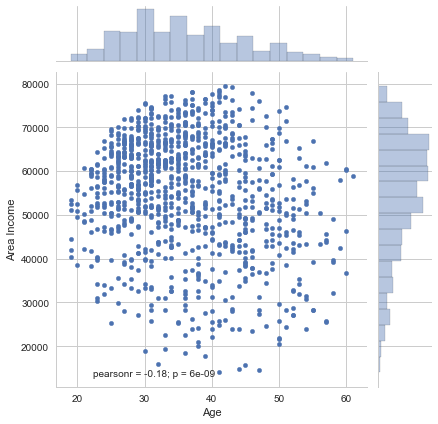

In [22]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Age', y='Area Income', data=ad_data, joint_kws={"s": 20})

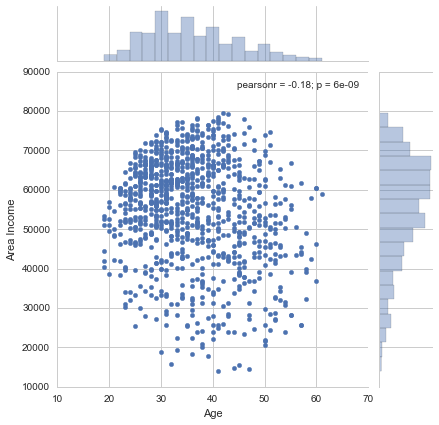

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


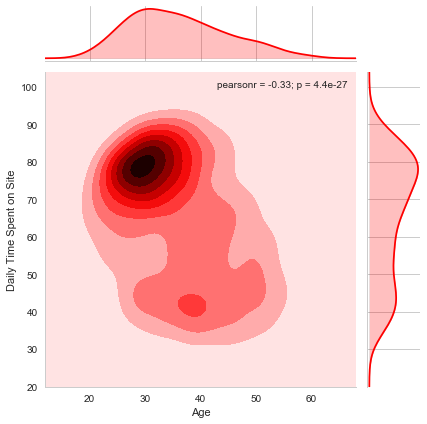

In [24]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

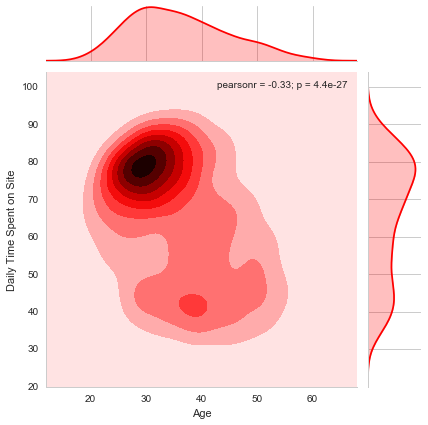

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

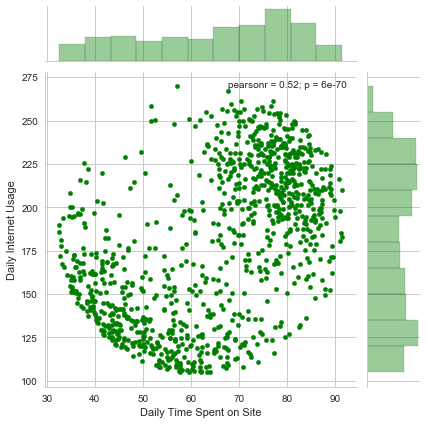

In [26]:
plt.figure(figsize=(10,8))
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, joint_kws={"s": 20}, color='green')

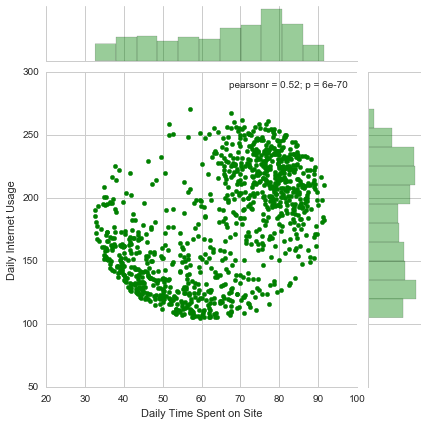

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

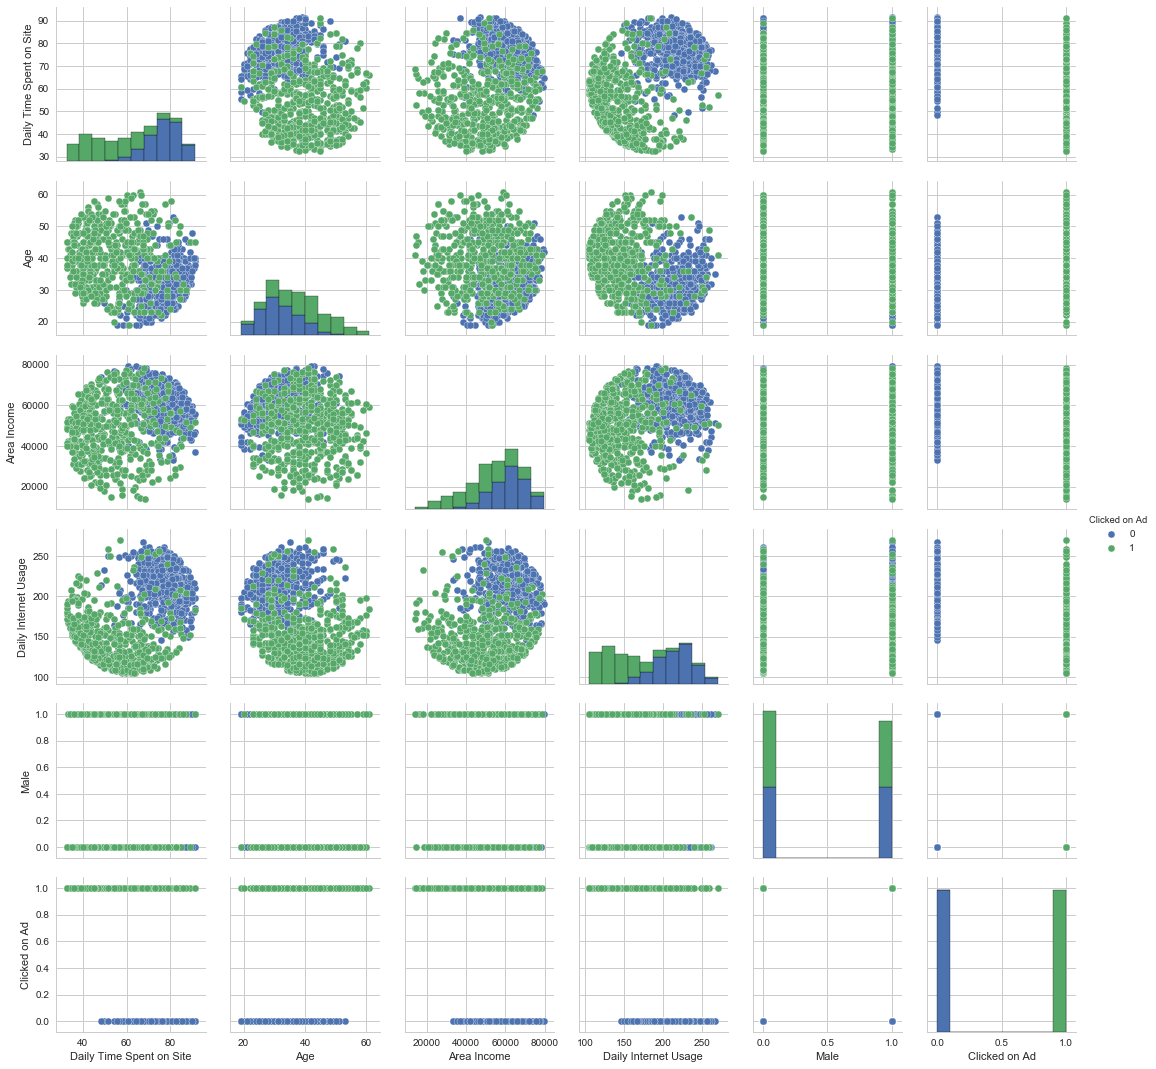

In [27]:
sns.pairplot(ad_data, hue='Clicked on Ad')

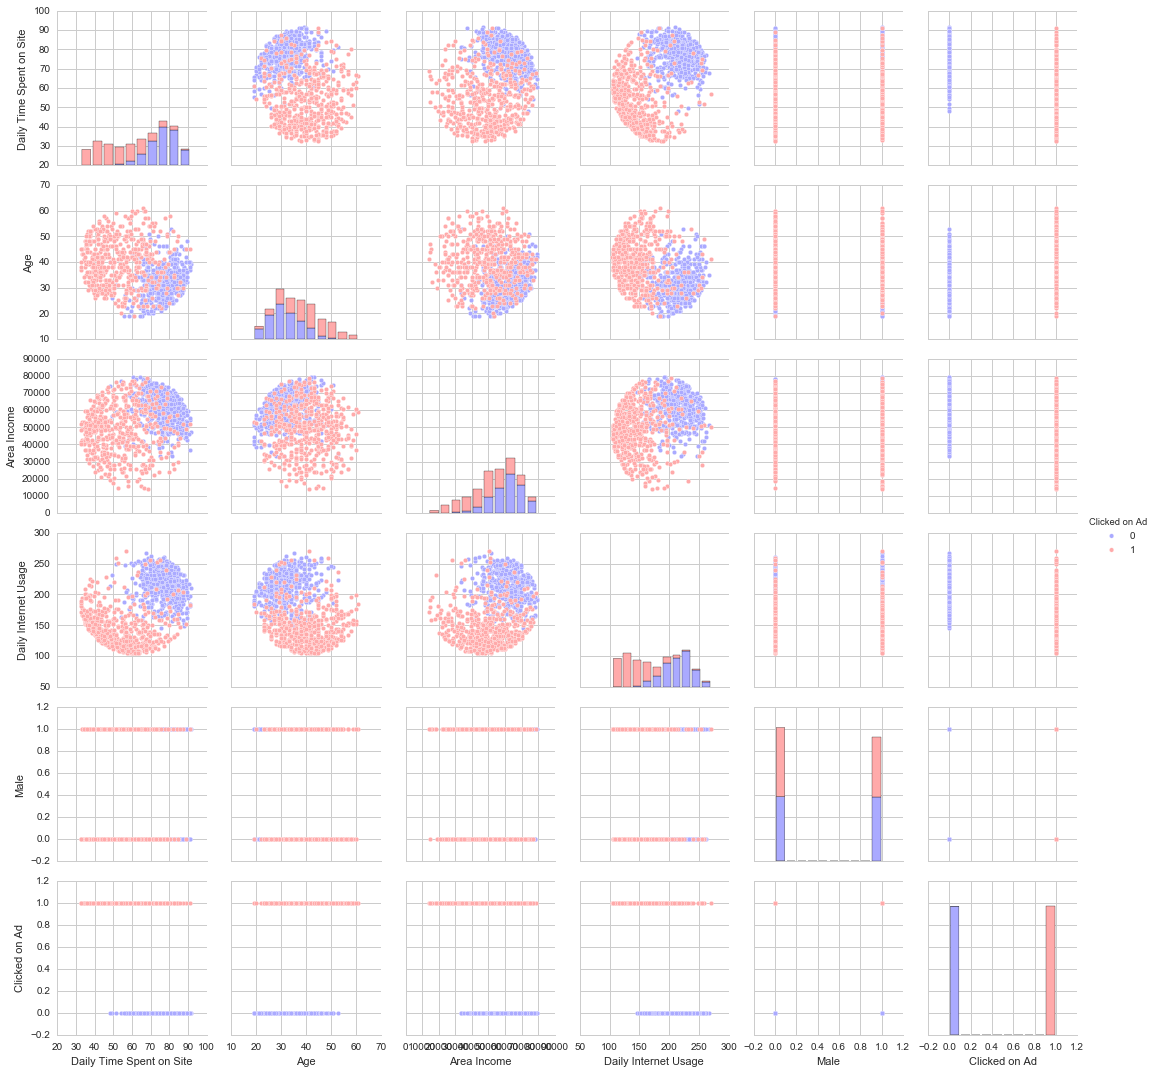

In [29]:
ad_data['City'].value_counts()

Williamsport            3
Lisamouth               3
Robertfurt              2
West Shannon            2
West Steven             2
New Sheila              2
Lake Jose               2
West Amanda             2
Lake Susan              2
Michelleside            2
Joneston                2
Pamelamouth             2
Lake David              2
East Timothy            2
Shelbyport              2
East John               2
Millerbury              2
Benjaminchester         2
Lake Patrick            2
New Jessicaport         2
Port Julie              2
Port Jason              2
South Lisa              2
Johnstad                2
Wrightburgh             2
Millertown              2
Port Juan               2
Lake James              2
North Daniel            2
East Valerie            1
                       ..
East Sharon             1
Melissastad             1
West Aprilport          1
Millerland              1
Ianmouth                1
North Alexandra         1
Combsstad               1
North Angela

In [30]:
ad_data['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Greece                                                 8
Turkey                                                 8
Australia                                              8
Liberia                                                8
South Africa                                           8
Afghanistan                                            8
Senegal                                                8
Cyprus                                                 8
Micronesia                                             8
Peru                                                   8
Cambodia                                               7
Western Sahara                                         7
Venezuela                                              7
Burundi                                                7
Taiwan                                                 7
Luxembourg                     

In [31]:
ad_data['Ad Topic Line'].value_counts()

Fundamental methodical support                             1
Expanded value-added emulation                             1
Mandatory dedicated data-warehouse                         1
Cloned incremental matrices                                1
Persistent fault-tolerant service-desk                     1
Pre-emptive content-based focus group                      1
Self-enabling zero administration neural-net               1
Robust logistical utilization                              1
Progressive intermediate throughput                        1
Up-sized bifurcated capability                             1
Managed grid-enabled standardization                       1
Managed 24hour analyzer                                    1
Networked logistical info-mediaries                        1
Face-to-face multimedia success                            1
Persevering 5thgeneration knowledge user                   1
Upgradable even-keeled hardware                            1
Ameliorated exuding encr

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [33]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [34]:
y = ad_data['Clicked on Ad']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logm = LogisticRegression()

In [38]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [40]:
predictions = logm.predict(X_test)

** Create a classification report for the model.**

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [44]:
from sklearn import metrics

In [46]:
logm.score(X_test, y_test)

0.92333333333333334